# Subsidy Distribution Belgium Brussels: EDA 🇧🇪

# Table of Content

1. [Introduction](#intro)
2. [Importing Libraries](#lib)
3. [Loading The Data](#data)
4. [Data Engineering](#de)
5. [Data Analysis](#da)
6. [References](#ref)

<a id="intro"></a>
# Introduction

This Exploratory data analysis will look at the distribution of where most funds in subsidies goes in Brussels. The data and labels are in French/Dutch. You won't need to know their translation as I will translate the import parts of the data during this notebook.

<a id="lib"></a>
# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="data"></a>
# Loading the data

In [2]:
with open('../input/subsidy-distribution-belgium-brussels/Subsides_Subsidies_2020.csv') as f:
    print(f)

<_io.TextIOWrapper name='../input/subsidy-distribution-belgium-brussels/Subsides_Subsidies_2020.csv' mode='r' encoding='UTF-8'>


Loading the data had some issues as it couldn't read the  UTF-8 encoding, so I had to use latin1. Most columns won't be important. Here some extra description of each column and their translation

* *Article budgétaire - Begrotingsartikel*: Column of **Law identifications** (this can be useful
* *Nom de la subvention - Naam van de subsidie*: Basicly, we got **2 types of subsidy** in this column. **Normal subsidy** (= routine costs of operating the City) and **long term subsidy** (investments which have lasting effects which a longer perspective) (translations: Subside budget ordinaire – Toelage gewone begroting = Normal Subsidy; Subside budget extraordinaire – Toelage buitengewone begroting = Long Term subsidy) 
* *Nom du bénéficiaire de la subvention - Naam begunstigde van de subsidie*: **Name** of the **organisation**/task receiving the subsidie.
* *Le numéro de BCE du bénéficiaire de la subvention - KBO-nummer van de begunstigde van de subsidie*: **Company ID**
* *L'objet de la subvention - Doel van de subsidie*: **Reason** for Subsidy
* *Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020*: Amount of **money expected to receive in 2020** in euro 
* *Montant octroyé - Toegekend bedrag*: Amount of **money received in euro** in 2020
* *L'année de début d'octroi de la subvention -  Beginjaar waarin de subsidie wordt toegekend*: **Starting year** of expected subsidy
* *L'année de fin d'octroi de la subvention -  Eindjaar waarin de subsidie wordt toegekend*: **End year** of expected subsidy

In [3]:
data = pd.read_csv('../input/subsidy-distribution-belgium-brussels/Subsides_Subsidies_2020.csv', encoding= 'latin1', sep=';')
data.head()

,Article budgétaire - Begrotingsartikel,Nom de la subvention - Naam van de subsidie,Nom du bénéficiaire de la subvention - Naam begunstigde van de subsidie,Le numéro de BCE du bénéficiaire de la subvention - KBO-nummer van de begunstigde van de subsidie,L'objet de la subvention - Doel van de subsidie,Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020,Montant octroyé - Toegekend bedrag,L'année de début d'octroi de la subvention - Beginjaar waarin de subsidie wordt toegekend,L'année de fin d'octroi de la subvention - Eindjaar waarin de subsidie wordt toegekend
0,10101-33101,Subside budget ordinaire  Toelage gewone begr...,Fédération des Secrétaires communaux de la Rég...,825356172.0,Cotisation de membre - lidmaatschapsbijdrage,"200,00","200,00",2020,2021
1,10101-33201,Subside budget ordinaire  Toelage gewone begr...,Conférence des Bourgmestres. - Vergadering der...,NaN,Cotisation de membre - lidmaatschapsbijdrage,"4.525,00","4.525,00",2020,2021
2,10101-33201,Subside budget ordinaire  Toelage gewone begr...,PLANU.be,506972577.0,Cotisation de membre - lidmaatschapsbijdrage,"75,00","75,00",2020,2021
3,10401-32101,Subside budget ordinaire  Toelage gewone begr...,Les moutons bxlois,690609316.0,Initiatives durables - Initiatieven voor duurz...,"5.000,00","5.000,00",2020,2021
4,10401-32101,Subside budget ordinaire  Toelage gewone begr...,Habitat Groupé TIVOLI,665601231.0,Initiatives durables - Initiatieven voor duurz...,"5.000,00","5.000,00",2020,2021


In [4]:
data.shape

(1233, 9)

<a id="de"></a>
# Data Engineering

**Column analysis**

* The first column won't be important as it represents Law identifications. The column about "the reason for the subsidy"(column 5) will encapsulate the same meaning of the data.
* The name of the subsidy (column 2) might be interesting to see how much money goes into long term and routine investments. So let's keep that and encode it later. (encoding means changing the "text" to an integer (0,1,2,3,...))
* Name of the subsidy receiver (column 3) might be usefull to know which company/organisation is receiving the most/least
* Company Id (column 4) is useless for us, so we will delete that.
* Reason of subsidy (column 5) will be interesting to know what category the city spends the most on.
* Amount of money expected to receive (column 6) is usefull!
* Column 7,8,9 are pretty useless as they are the same number as column 6 and column 8-9 might not even be usefull here as subsidies get extended a lot.

**What to do**

* Remove column 1,4,7,8,9
* Encode column 2,5 (maybe this is not necessary)

In [5]:
droppedLabels = data.columns[[0,3,6,7,8]]
data.drop(droppedLabels, inplace=True, axis=1)
data.head()

,Nom de la subvention - Naam van de subsidie,Nom du bénéficiaire de la subvention - Naam begunstigde van de subsidie,L'objet de la subvention - Doel van de subsidie,Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020
0,Subside budget ordinaire  Toelage gewone begr...,Fédération des Secrétaires communaux de la Rég...,Cotisation de membre - lidmaatschapsbijdrage,"200,00"
1,Subside budget ordinaire  Toelage gewone begr...,Conférence des Bourgmestres. - Vergadering der...,Cotisation de membre - lidmaatschapsbijdrage,"4.525,00"
2,Subside budget ordinaire  Toelage gewone begr...,PLANU.be,Cotisation de membre - lidmaatschapsbijdrage,"75,00"
3,Subside budget ordinaire  Toelage gewone begr...,Les moutons bxlois,Initiatives durables - Initiatieven voor duurz...,"5.000,00"
4,Subside budget ordinaire  Toelage gewone begr...,Habitat Groupé TIVOLI,Initiatives durables - Initiatieven voor duurz...,"5.000,00"


Our last column which hold the amount of money is still in Strings, we need to change this to Floats. On top of that, because it uses , instead of . for decimals, we will need to change this for the type change to be available.

In [6]:
float_data = []

for i in data.iloc[:,3]:
    i =  i.replace('.', '')
    float_data.append(int(i[:-3]))
data['Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020'] = float_data

We will hold a copy of the original cleaned data in backup_data for later use.

In [7]:
backup_data = data.copy()

<a id="da"></a>
# Data Analysis

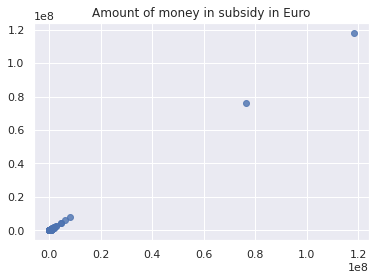

In [8]:
sns.set(style="darkgrid")

ax = sns.regplot(x=data.iloc[:,3], y=data.iloc[:,3], fit_reg=False)
ax.set(xlabel = "", ylabel= "", title= "Amount of money in subsidy in Euro")

plt.show()

As you can see in the above scatter plot, we notice a few outliers who received a large amount of subsidies. Let's look at which they are and eliminate them from the data afterwards.

In [9]:
outlier_indexes = []
index = 0
for i in data.iloc[:,3]:
    if i > 10_000_000:
        outlier_indexes.append(index)
    index += 1
    
data.iloc[outlier_indexes,:]

,Nom de la subvention - Naam van de subsidie,Nom du bénéficiaire de la subvention - Naam begunstigde van de subsidie,L'objet de la subvention - Doel van de subsidie,Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020
121,Subside budget ordinaire  Toelage gewone begr...,Zone de Police - Politiezone,Contribution dans les charges de fonctionnemen...,118136045
915,Subside budget ordinaire  Toelage gewone begr...,Centre Public d'action sociale de Bruxelles-Op...,"Dotation (Comité de concertation), rétrocessio...",76175512


**So what does this all mean?**

* Politiezone: **118 million** was invested into the **police force** to sustain it's operations. This is significantly higher then all other subsidies, but we cannot conclude if this is a lot by belgian police standards.
* Dotatie overlegcomité: **76 million** was invested into the political **"meeting" of all the governmental institutions**. The meaning and detailed breakdown of this wasn't easily tracable online. So I cannot conclude if this is big or not.

let's now remove these outliers from the data

In [10]:
data.drop(outlier_indexes, axis = 0, inplace=True)

The scatter plot looks way better now :)

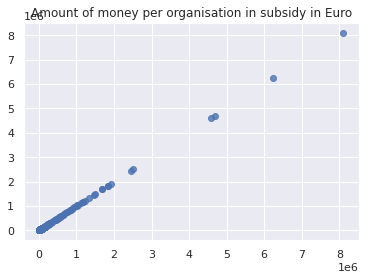

In [11]:
ax = sns.regplot(x=data.iloc[:,3], y=data.iloc[:,3], fit_reg=False)
ax.set(xlabel = "", ylabel= "", title= "Amount of money per organisation in subsidy in Euro")

plt.show()

We can conclude that a lot of small subsidies are being given. The Histogram will obviously be skewed and not be a normal distribution. But let's double check that. We still have lots of outliers so, I will remove a lot so we can view the biggest chunk of data in a histogram.

In [12]:
outlier_indexes = []
index = 0
for i in data.iloc[:,3]:
    if i > 500_000:
        outlier_indexes.append(index)
    index += 1
    
data.drop(data.index[outlier_indexes], axis = 0, inplace=True)

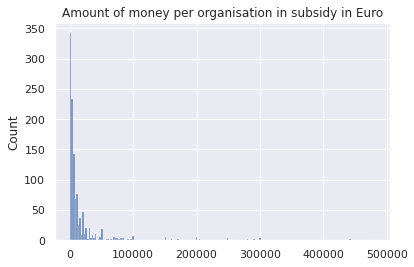

In [13]:
ax = sns.histplot(data=data, x="Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020")
ax.set(title= 'Amount of money per organisation in subsidy in Euro', xlabel= "")
plt.show()

This confirms our believe that Brussels subsidieses a lot of organisations with a smaller budget.

Let's further look at how much long term subidies compare to the "normal" subsidies.

In [14]:
data_long_term_subsidy = data.loc[data['Nom de la subvention - Naam van de subsidie'] == 'Subside budget extraordinaire \x96 Toelage buitengewone begroting ']
data_normal_subsidy = data.loc[data['Nom de la subvention - Naam van de subsidie'] == 'Subside budget ordinaire \x96 Toelage gewone begroting']

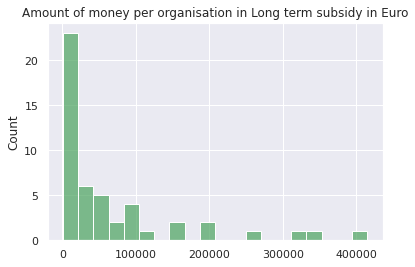

In [15]:
ax = sns.histplot(data=data_long_term_subsidy, x="Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020", color='g',bins= 20)

ax.set(title= 'Amount of money per organisation in Long term subsidy in Euro', xlabel= "")
plt.show()

It still has the same distribution than the short "normal" subsidies. Now let's compare them on the same histogram.

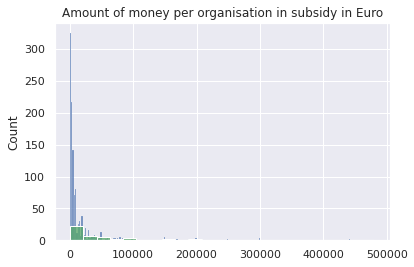

In [16]:
sns.histplot(data=data_normal_subsidy, x="Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020")
ax = sns.histplot(data=data_long_term_subsidy, x="Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020", color='g',bins= 20)

ax.set(title= 'Amount of money per organisation in subsidy in Euro', xlabel= "")
plt.show()

It's obvious here that way more is being spend on "normal" subsidies compared to long term investements.

Let's compare the sum of money each receives.

In [17]:
backup_long_term_subsidy = backup_data.loc[backup_data['Nom de la subvention - Naam van de subsidie'] == 'Subside budget extraordinaire \x96 Toelage buitengewone begroting ']
backup_normal_subsidy = backup_data.loc[backup_data['Nom de la subvention - Naam van de subsidie'] == 'Subside budget ordinaire \x96 Toelage gewone begroting']

In [18]:
sum_long = backup_long_term_subsidy.iloc[:,3].sum()
sum_norm = backup_normal_subsidy.iloc[:,3].sum()

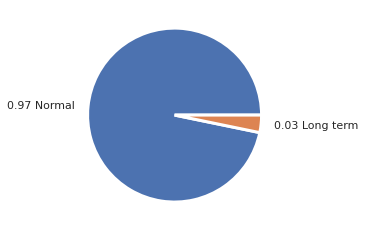

In [19]:
labels = ["{:.2f} Normal".format(sum_norm/(sum_norm + sum_long)), "{:.2f} Long term".format(sum_long/(sum_norm + sum_long))]
values = [sum_norm, sum_long]

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels= labels, labeldistance= 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

It's clear here, that we conclude a lot is being spend on "normal" subsidies and only 3% is spend on long term investments.

Let's see which category receives the biggest amount.

In [20]:
sorted_data = backup_data.sort_values(by=['Montant prévu au budget 2020 - Bedrag voorzien op begroting 2020'], ascending= False)

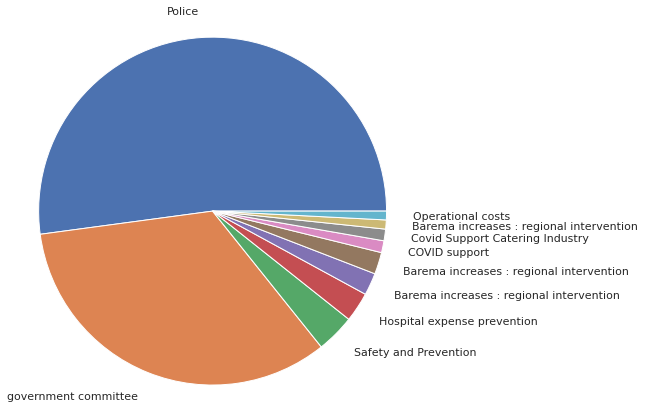

In [21]:
labels = ["Police","government committee","Safety and Prevention","Hospital expense prevention", "Barema increases : regional intervention", "Barema increases : regional intervention","COVID support", "Covid Support Catering Industry", "Barema increases : regional intervention", "Operational costs"]
values = sorted_data.iloc[:10,3]

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels= labels, labeldistance= 1.15, radius= 2);
plt.show();

In the above pie chart, we see the 10 biggest subsidies. It's obvious here that government committee is way too big of an expense and needs to be looked into for efficiency purposes.

To my surprise, the COVID relief for businesses and others is relatively low as the whole sector was shut down. I wonder how many really needed covid relief and how many actually received it. This should be researched more.

I do think I could go deeper into this data analysis but as a lot of the "categories" of the subsidies are not very "categorized" well, I would have to translate and go through almost 200-300 different labels. So I will leave at this.

I hope this was helpful for some :) Good luck out there!

<a id="ref"></a>
# References

I used the following reference website to make some of the charts: https://www.python-graph-gallery.com/